<a href="https://colab.research.google.com/github/anand1994sp/MACHINE-LEARNING-PROJECTS/blob/main/Self_DATA_PREPROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [409]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [410]:

import opendatasets as od

In [411]:
import opendatasets as od
dataset_url="https://www.kaggle.com/competitions/titanic/data"
od.download(dataset_url)

Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [413]:
df=pd.read_csv("/content/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [414]:
df.shape

(891, 12)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [416]:
#check Missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [417]:
#"Age","Cabin","Embarked"

In [418]:
print(df.isnull().sum()*100/len(df))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [419]:
miss=df.isnull().sum()*100/len(df)

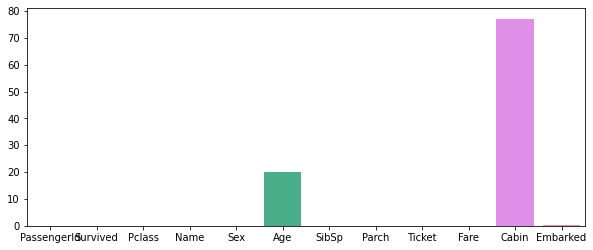

In [420]:
plt.figure(figsize=(10,4))
sns.barplot(x=miss.index,y=miss)

as Cabin has more than 25% missing we will drop it

In [421]:
df=df.drop("Cabin",axis=1)

In [422]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [423]:
#"Age","Embarked"

In [424]:
df["Age"].dtype

dtype('float64')

In [425]:
df["Embarked"].dtype

dtype('O')

We will fill Embarked with mode as its datatype is object

In [426]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [427]:
#We will check if outlier present in Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


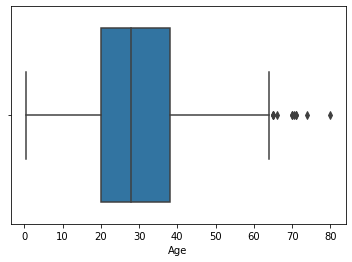

In [428]:
sns.boxplot(df["Age"])

In [429]:
#since we have outlier we will fill null with median

In [430]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [431]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#STEP:ENCODING

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [433]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [434]:
#"PassengerId","Name","Ticket","Embarked" - Droping irrelevent columns

In [435]:
df2=df.drop(["PassengerId","Name","Ticket","Fare"],axis=1)

In [436]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [437]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [438]:
df2["Sex"]=df2["Sex"].astype("category")

In [439]:
df2["Sex"]=df2["Sex"].cat.codes

In [440]:
df2=pd.get_dummies(df2,columns=["Embarked"])

In [441]:
df2=df2.drop("Embarked_Q",axis=1)

In [442]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_S
0,0,3,1,22.0,1,0,0,1
1,1,1,0,38.0,1,0,1,0
2,1,3,0,26.0,0,0,0,1
3,1,1,0,35.0,1,0,0,1
4,0,3,1,35.0,0,0,0,1


#STEP 3 Finding Outliers

In [443]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C',
       'Embarked_S'],
      dtype='object')

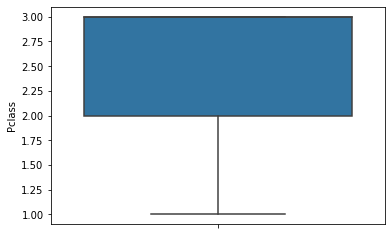

In [444]:
sns.boxplot(y="Pclass",data=df2)

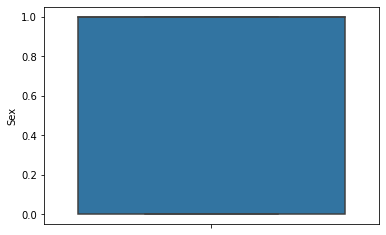

In [445]:
sns.boxplot(y="Sex",data=df2)

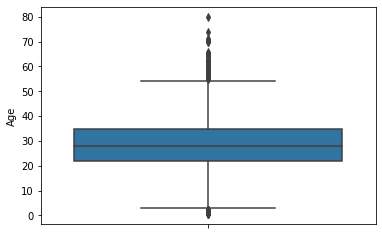

In [446]:
sns.boxplot(y="Age",data=df2)

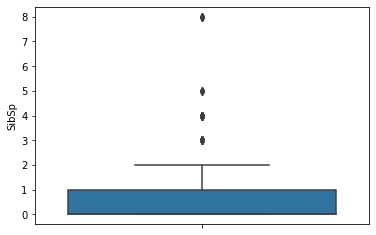

In [447]:
sns.boxplot(y="SibSp",data=df2)

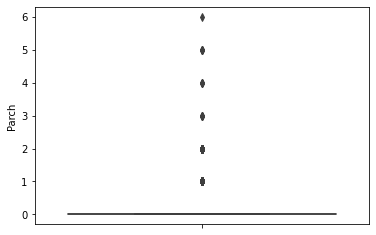

In [448]:
sns.boxplot(y="Parch",data=df2)

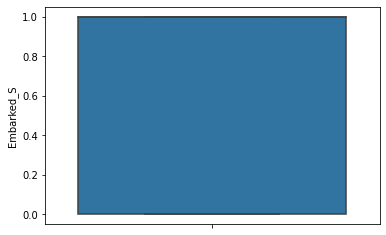

In [449]:
sns.boxplot(y="Embarked_S",data=df2)

In [450]:
outliers=['Age', 'SibSp', 'Parch', 'Fare']

In [451]:
q1=df2.quantile(0.25)
q3=df2.quantile(0.75)
iqr=q3-q1

In [452]:
#df2=df2[~((df2<(q1-iqr*1.5))|(df2>(q3+iqr*1.5))).any(axis=1)]
df2=df2[~((df2 < (q1-1.5*iqr))|(df2 >(q3+1.5*iqr))).any(axis=1)]

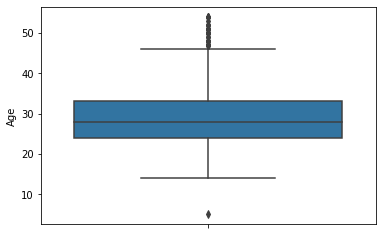

In [453]:
sns.boxplot(y="Age",data=df2)

In [454]:
x=df2.iloc[:,1:]
y=df2.iloc[:,0]

In [455]:
#Step 4: Scalling

In [456]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scal=scaler.fit_transform(x)

In [468]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
norm=scaler.fit_transform(x)

In [457]:
df3=pd.DataFrame(scal,columns=x.columns)

In [458]:
df3.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_S
0,0.716992,0.596381,-0.879220,1.636879,0.0,0.0,0.378785
1,0.716992,-1.676781,-0.413959,-0.458007,0.0,0.0,0.378785


In [459]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=101)

In [460]:
#Step 5 Imbalance

In [461]:
y.head()

0    0
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64

In [467]:
y.value_counts()

0    365
1    161
Name: Survived, dtype: int64

In [465]:
pd.crosstab(index=y,columns="dd")

col_0,dd
Survived,
0,365
1,161


In [469]:
from imblearn.under_sampling import RandomUnderSampler
under=RandomUnderSampler()
x_under,y_under=under.fit_resample(x,y)

In [470]:
from imblearn.under_sampling import NearMiss
near=NearMiss()
X_under,y_under=near.fit_resample(x,y)

In [471]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
x_over,y_over=over.fit_resample(x,y)

In [473]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_over,Y_over=smote.fit_resample(x,y)

In [474]:
print("x under",x_under.shape)
print("y under",y_under.shape)

print("x under",X_under.shape)
print("y under",X_under.shape)

print("x over",x_over.shape)
print("y over",y_over.shape)

print("x over",X_over.shape)
print("y over",X_over.shape)

x under (322, 7)
y under (322,)
x under (322, 7)
y under (322, 7)
x over (730, 7)
y over (730,)
x over (730, 7)
y over (730, 7)
